**Name:**               **PRN:**              
Alvin Abraham        202201070132
Nishant Rajat        202201070131
Chinmay Parite       202201070134
Ritesh Rodge         202201070121

DIV: B

**BANK CHURN PREDICTION**

Importing Libraries and loading Data

In [2]:
# Loading libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA
from collections import Counter

# Data preprocessing
from sklearn.preprocessing import StandardScaler, minmax_scale

# Data splitting
from sklearn.model_selection import train_test_split, KFold

# Data modeling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, recall_score
from sklearn.metrics import f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.svm import LinearSVC

# Warning
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data = pd.read_csv('/content/Churn_Modelling.csv')

# Drop irrelevant columns
data_cleaned = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

Checking for missing values

In [ ]:
data_cleaned.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Descriptive statistics

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


EDA

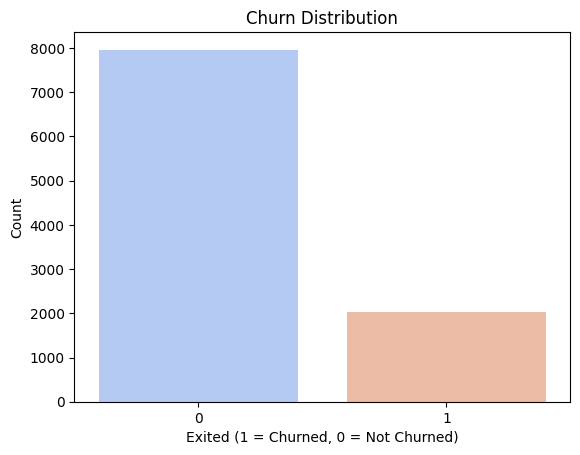

In [ ]:
# Count of customers who churned vs. stayed
sns.countplot(data=data_cleaned, x="Exited", palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Exited (1 = Churned, 0 = Not Churned)")
plt.ylabel("Count")
plt.show()

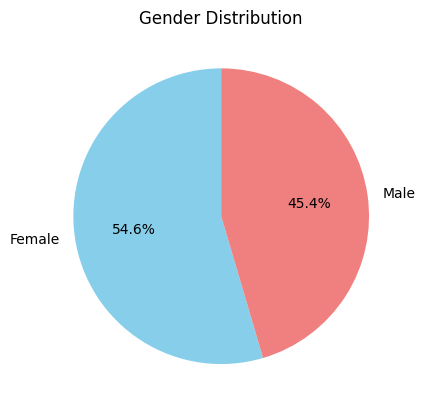

In [ ]:
# Pie chart for gender distribution
gender_counts = data_cleaned['Gender'].value_counts()
plt.pie(gender_counts, labels=["Female", "Male"], autopct="%1.1f%%", startangle=90, colors=["skyblue", "lightcoral"])
plt.title("Gender Distribution")
plt.show()

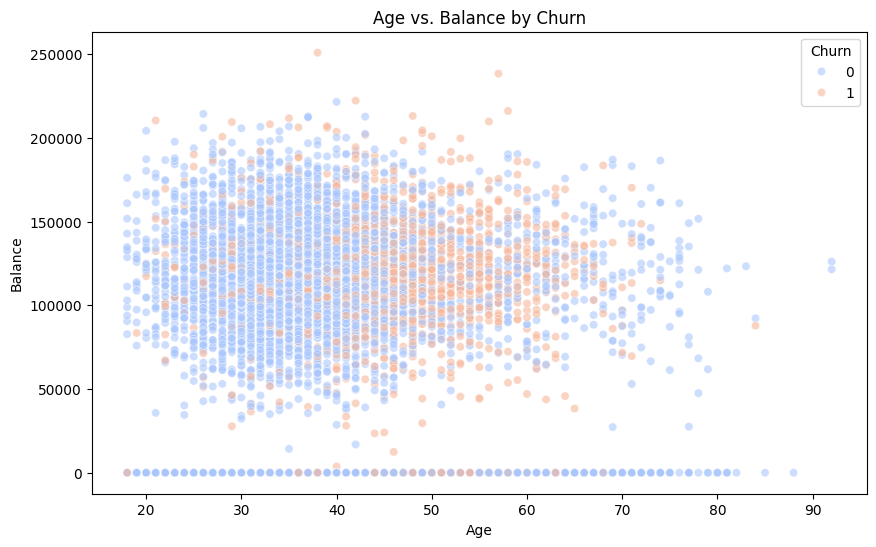

In [ ]:
# Scatter plot for Age vs. Balance colored by churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x="Age", y="Balance", hue="Exited", palette="coolwarm", alpha=0.6)
plt.title("Age vs. Balance by Churn")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend(title="Churn")
plt.show()

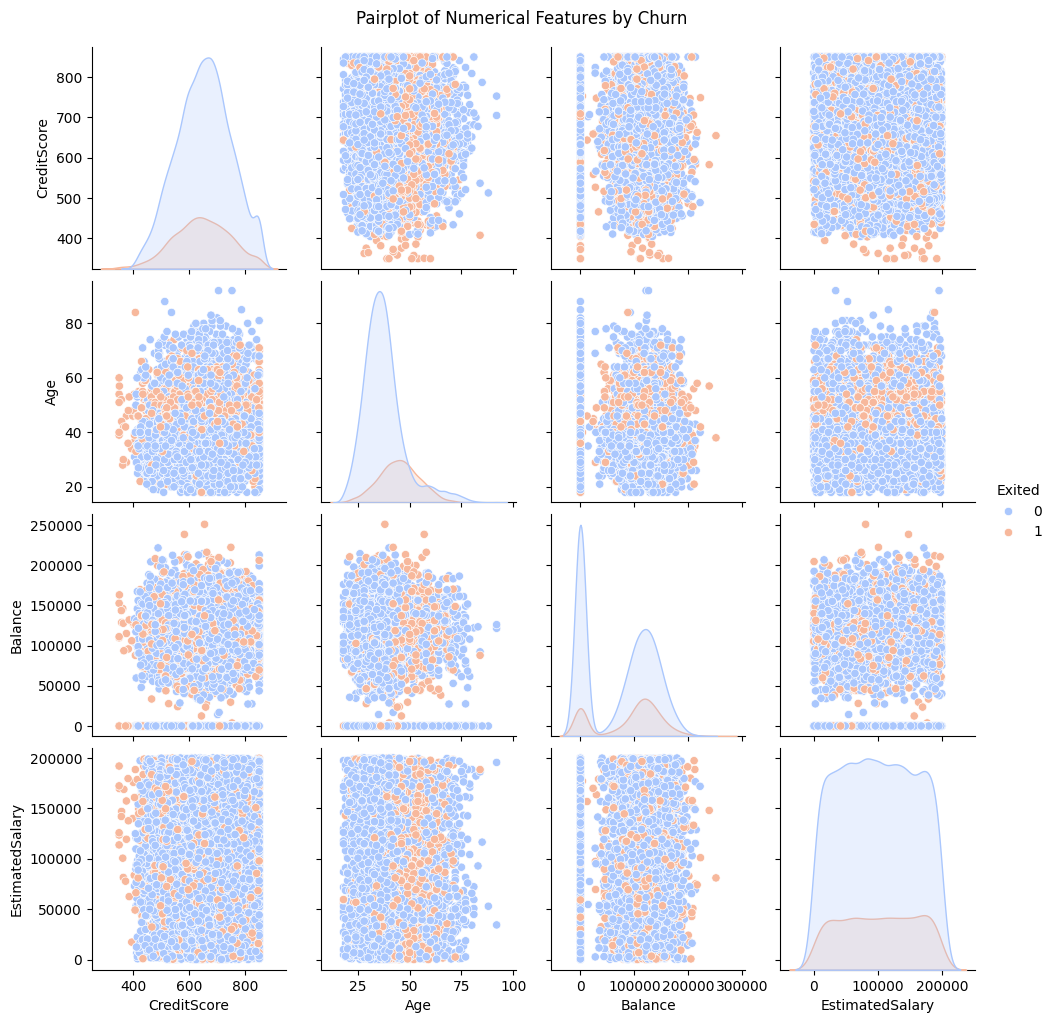

In [ ]:
# Pairplot for numerical features
sns.pairplot(data=data_cleaned, vars=["CreditScore", "Age", "Balance", "EstimatedSalary"], hue="Exited", palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features by Churn", y=1.02)
plt.show()

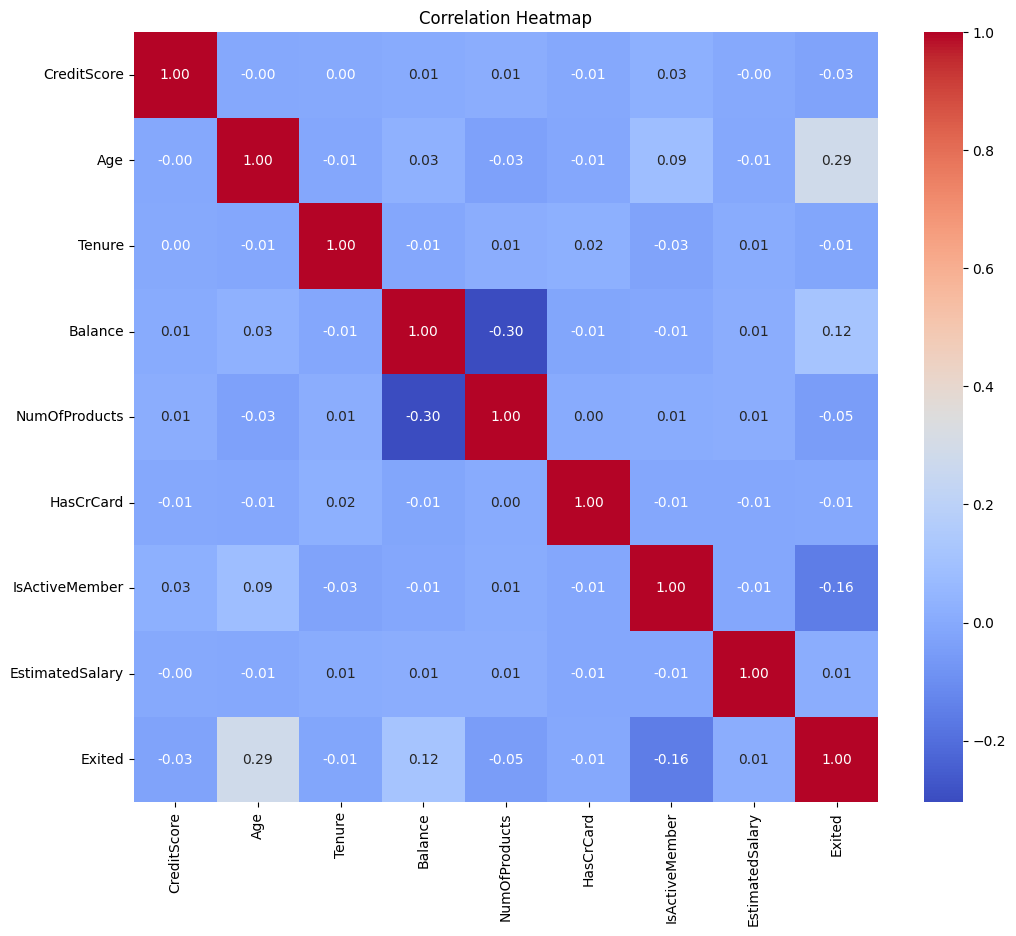

In [ ]:
# Performing one-hot encoding on categorical features
data_encoded = pd.get_dummies(data_cleaned, columns=['Geography', 'Gender'], drop_first=True)

# Calculating correlation on numerical features
numerical_features = data_encoded.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Data Preprocessing

In [3]:
# Encoding categorical variables
data_cleaned["Gender"] = data_cleaned["Gender"].map({"Female": 0, "Male": 1})
data_encoded = pd.get_dummies(data_cleaned, columns=["Geography"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Define features and target
X = data_encoded.drop(columns=["Exited"])
y = data_encoded["Exited"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Model Preparation and Evaluation- Implementing various algorithms

In [4]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
m1 = "Logistic Regression"
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("Confusion Matrix for Logistic Regression:")
print(lr_conf_matrix)
print("\nAccuracy of Logistic Regression:", lr_acc_score * 100, '%\n')
print(classification_report(y_test, lr_predict))

Confusion Matrix for Logistic Regression:
[[2658  123]
 [ 570  149]]

Accuracy of Logistic Regression: 80.2 %

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2781
           1       0.55      0.21      0.30       719

    accuracy                           0.80      3500
   macro avg       0.69      0.58      0.59      3500
weighted avg       0.77      0.80      0.76      3500



In [5]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)

print("Decision Tree Classifier Confusion Matrix:\n", dt_conf_matrix)
print("\n")
print(f"Accuracy of Decision Tree Classifier: {dt_acc_score * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, dt_predict))

Decision Tree Classifier Confusion Matrix:
 [[2391  390]
 [ 357  362]]


Accuracy of Decision Tree Classifier: 78.66%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      2781
           1       0.48      0.50      0.49       719

    accuracy                           0.79      3500
   macro avg       0.68      0.68      0.68      3500
weighted avg       0.79      0.79      0.79      3500



In [6]:
# XGBoost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
m7 = 'Extreme Gradient Boost'
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=10)
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
xgb_acc_score = accuracy_score(y_test, xgb_predict)

print(f"{m7} Confusion Matrix:\n", xgb_conf_matrix)
print("\n")
print(f"Accuracy of {m7}: {xgb_acc_score * 100:.2f}%\n")
print(classification_report(y_test, xgb_predict))

Extreme Gradient Boost Confusion Matrix:
 [[2617  164]
 [ 370  349]]


Accuracy of Extreme Gradient Boost: 84.74%

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2781
           1       0.68      0.49      0.57       719

    accuracy                           0.85      3500
   macro avg       0.78      0.71      0.74      3500
weighted avg       0.84      0.85      0.84      3500



In [7]:
# Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
m3 = "Random Forest Classifier"
rf = RandomForestClassifier(max_depth=5, random_state=10)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Confusion Matrix for Random Forest:")
print(rf_conf_matrix)
print("\nAccuracy of Random Forest:", rf_acc_score * 100, '%\n')
print(classification_report(y_test, rf_predicted))

Confusion Matrix for Random Forest:
[[2731   50]
 [ 476  243]]

Accuracy of Random Forest: 84.97142857142858 %

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2781
           1       0.83      0.34      0.48       719

    accuracy                           0.85      3500
   macro avg       0.84      0.66      0.70      3500
weighted avg       0.85      0.85      0.82      3500



In [8]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
m2 = "Naive Bayes"
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("Confusion Matrix for Naive Bayes:")
print(nb_conf_matrix)
print("\nAccuracy of Naive Bayes:", nb_acc_score * 100, '%\n')
print(classification_report(y_test, nbpred))

Confusion Matrix for Naive Bayes:
[[2605  176]
 [ 478  241]]

Accuracy of Naive Bayes: 81.31428571428572 %

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2781
           1       0.58      0.34      0.42       719

    accuracy                           0.81      3500
   macro avg       0.71      0.64      0.66      3500
weighted avg       0.79      0.81      0.79      3500



In [9]:
# K-Nearest Neighbour
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
m4 = "K-Nearest Neighbour"
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("Confusion Matrix for K-Nearest Neighbour:")
print(knn_conf_matrix)
print("\nAccuracy of K-Nearest Neighbour:", knn_acc_score * 100, '%\n')
print(classification_report(y_test, knn_predicted))

Confusion Matrix for K-Nearest Neighbour:
[[2631  150]
 [ 468  251]]

Accuracy of K-Nearest Neighbour: 82.34285714285714 %

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      2781
           1       0.63      0.35      0.45       719

    accuracy                           0.82      3500
   macro avg       0.74      0.65      0.67      3500
weighted avg       0.80      0.82      0.80      3500



In [10]:
# SVM Model
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

# Metrics for SVM
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)

# Print results
print("Confusion Matrix for SVM:")
print(svc_conf_matrix)
print("\nAccuracy of SVM:", svc_acc_score * 100, '\n')
print("Classification Report for SVM:")
print(classification_report(y_test, svc_predict))


Confusion Matrix for SVM:
[[2767   14]
 [ 627   92]]

Accuracy of SVM: 81.68571428571428 

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2781
           1       0.87      0.13      0.22       719

    accuracy                           0.82      3500
   macro avg       0.84      0.56      0.56      3500
weighted avg       0.83      0.82      0.76      3500



Comparing Models

In [11]:
# Evaluation DataFrame for selected models
model_ev = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Extreme Gradient Boost',
        'Random Forest',
        'Naive Bayes',
        'K-Nearest Neighbour',
        'Support Vector Machine'
    ],
    'Accuracy': [
        lr_acc_score * 100,
        dt_acc_score * 100,
        xgb_acc_score * 100,
        rf_acc_score * 100,
        nb_acc_score * 100,
        knn_acc_score * 100,
        svc_acc_score * 100
    ],
    'Precision': [
        precision_score(y_test, lr_predict) * 100,
        precision_score(y_test, dt_predict) * 100,
        precision_score(y_test, xgb_predict) * 100,
        precision_score(y_test, rf_predicted) * 100,
        precision_score(y_test, nbpred) * 100,
        precision_score(y_test, knn_predicted) * 100,
        precision_score(y_test, svc_predict) * 100
    ],
    'Recall': [
        recall_score(y_test, lr_predict) * 100,
        recall_score(y_test, dt_predict) * 100,
        recall_score(y_test, xgb_predict) * 100,
        recall_score(y_test, rf_predicted) * 100,
        recall_score(y_test, nbpred) * 100,
        recall_score(y_test, knn_predicted) * 100,
        recall_score(y_test, svc_predict) * 100
    ],
    'F1-Score': [
        f1_score(y_test, lr_predict) * 100,
        f1_score(y_test, dt_predict) * 100,
        f1_score(y_test, xgb_predict) * 100,
        f1_score(y_test, rf_predicted) * 100,
        f1_score(y_test, nbpred) * 100,
        f1_score(y_test, knn_predicted) * 100,
        f1_score(y_test, svc_predict) * 100
    ]
})

# Sort by Accuracy
model_ev.sort_values("Accuracy", axis=0, ascending=False, inplace=True, na_position='last')

# Display the DataFrame
print(model_ev)

                    Model   Accuracy  Precision     Recall   F1-Score
3           Random Forest  84.971429  82.935154  33.796940  48.023715
2  Extreme Gradient Boost  84.742857  68.031189  48.539638  56.655844
5     K-Nearest Neighbour  82.342857  62.593516  34.909597  44.821429
6  Support Vector Machine  81.685714  86.792453  12.795549  22.303030
4             Naive Bayes  81.314286  57.793765  33.518776  42.429577
0     Logistic Regression  80.200000  54.779412  20.723227  30.070636
1           Decision Tree  78.657143  48.138298  50.347705  49.218219


Visualizing Accuracy of Models

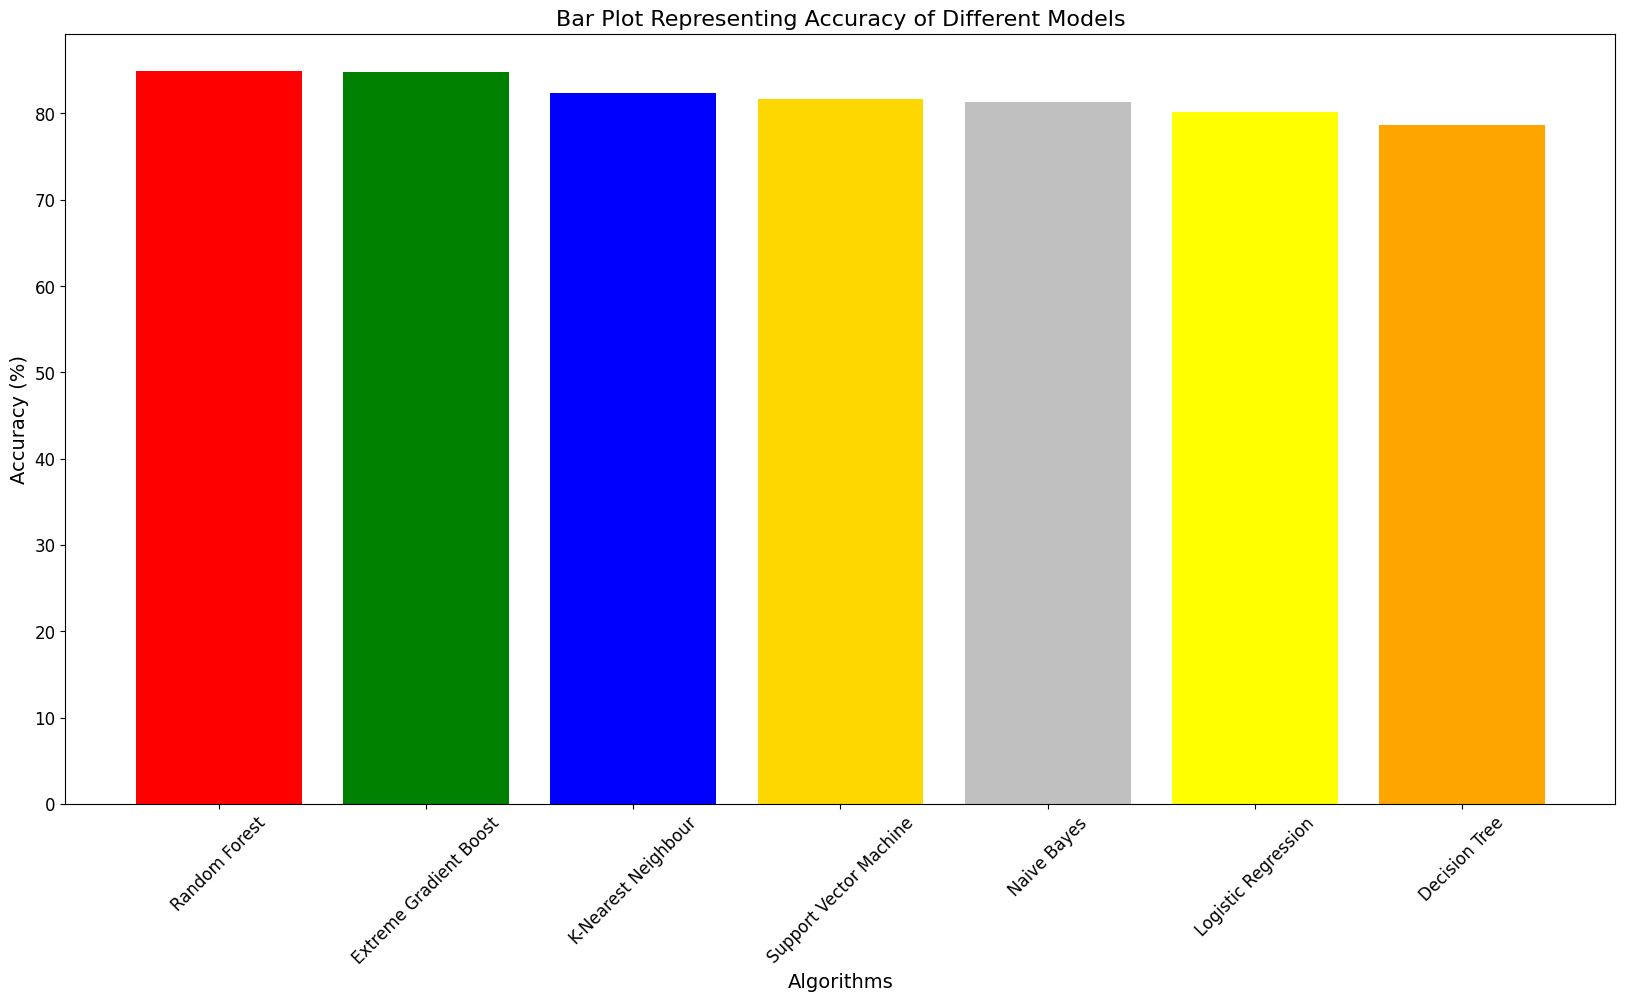

In [12]:
# Define colors for the bar plot
colors = ['red', 'green', 'blue', 'gold', 'silver', 'yellow', 'orange']

# Create the bar plot
plt.figure(figsize=(20, 10))
plt.title("Bar Plot Representing Accuracy of Different Models", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Algorithms", fontsize=14)
plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Selecting Top Four Models

In [13]:
TOP4=[]

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Number of folds
k = 10

# Initialize models
rf = RandomForestClassifier(max_depth=5, random_state=10)
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')
knn = KNeighborsClassifier()
svc = SVC(kernel='linear', probability=True, random_state=10)

# Perform K-Fold Cross Validation
models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'K-Nearest Neighbour': knn,
    'Support Vector Machine': svc
}

kfold_results = []

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
    kfold_results.append({
        'Model': model_name,
        'Accuracy Mean': np.mean(scores) * 100,
        'Accuracy Std': np.std(scores) * 100
    })

# Convert results to DataFrame
kfold_results_df = pd.DataFrame(kfold_results)

# Display the results
print(kfold_results_df)


                    Model  Accuracy Mean  Accuracy Std
0           Random Forest          85.46      0.877724
1                 XGBoost          85.28      0.716659
2     K-Nearest Neighbour          82.54      0.834506
3  Support Vector Machine          79.63      0.045826


Hyperparameter Tuning

In [15]:
# Define parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'max_samples': [0.5, 0.75, 1.0]
}

# Create the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              scoring='accuracy',
                              cv=5,
                              verbose=2,
                              n_jobs=-1)

# Fit the model with training data
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy from Grid Search:", grid_search_rf.best_score_)

# Evaluate on test data
best_rf = grid_search_rf.best_estimator_
rf_predicted = best_rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("\nConfusion Matrix for Optimized Random Forest:")
print(rf_conf_matrix)
print("\nAccuracy of Optimized Random Forest:", rf_acc_score * 100)
print("\nClassification Report for Optimized Random Forest:")
print(classification_report(y_test, rf_predicted))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_features': 'sqrt', 'max_samples': 0.5, 'n_estimators': 200}
Best Accuracy from Grid Search: 0.8658461538461537

Confusion Matrix for Optimized Random Forest:
[[2696   85]
 [ 405  314]]

Accuracy of Optimized Random Forest: 86.0

Classification Report for Optimized Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2781
           1       0.79      0.44      0.56       719

    accuracy                           0.86      3500
   macro avg       0.83      0.70      0.74      3500
weighted avg       0.85      0.86      0.84      3500



Prediction

In [17]:
# Assuming 'best_rf' is your best Random Forest model from hyperparameter tuning
best_model = best_rf

# New data for prediction (replace with your actual values)
new_data = np.array([[600, 40, 3, 60000, 2, 1, 1, 1, 1, 101349, 1,]])

# Select numerical features for scaling
numerical_features_indices = [0, 1, 3, 4]  # Indices of numerical features in new_data
numerical_features_to_scale = new_data[:, numerical_features_indices]

# Scale the numerical features using the previously fitted scaler
scaled_numerical_features = scaler.transform(numerical_features_to_scale)

# Replace original numerical features with scaled values in new_data
new_data[:, numerical_features_indices] = scaled_numerical_features

# Make prediction
prediction = best_model.predict(new_data)

print("Prediction (0 = Not Churned, 1 = Churned):", prediction)

Prediction (0 = Not Churned, 1 = Churned): [0]


In [20]:
# Predicting if a new customer will churn
def predict_churn(input_data, model):
    """
    Predicts whether a customer will churn based on input data and a trained model.

    Args:
        input_data (list): A list containing the customer's feature values in the same order as the training data.
        model: The trained model to use for prediction.

    Returns:
        str: "Churn" if the customer is predicted to leave, "Not Churn" otherwise.
    """
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = model.predict(input_df)[0]
    return "Churn" if prediction == 1 else "Not Churn"

# Ask user for input
def get_user_input():
    """
    Collects input data for a new customer interactively.

    Returns:
        list: A list of input values for the new customer.
    """
    print("Enter the following values for the customer:")
    feature_values = []

    # Adjust feature names to match your dataset
    feature_names = X.columns
    for feature in feature_names:
        value = input(f"{feature}: ")
        try:
            feature_values.append(float(value))
        except ValueError:
            print(f"Invalid input for {feature}. Please enter a numeric value.")
            return None
    return feature_values

# Get input data from the user
new_customer_data = get_user_input()

if new_customer_data is not None:
    # Predict churn using the best model
    result = predict_churn(new_customer_data, best_rf)
    print("\nPrediction for New Customer:", result)
else:
    print("Prediction aborted due to invalid inputs.")

Enter the following values for the customer:
CreditScore: 100
Gender: 1
Age: 20
Tenure: 1
Balance: 7000
NumOfProducts: 2
HasCrCard: 1
IsActiveMember: 0
EstimatedSalary: 5000
Geography_Germany: 0
Geography_Spain: 1

Prediction for New Customer: Churn


In [ ]:
import pickle
from google.colab import files

# ... your existing code ...

# Save the best model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf, file) # Save best_rf to model.pkl

# Now download the file
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np # Import numpy and assign it to the alias 'np'
import pandas as pd # Import pandas and assign it to the alias 'pd'
import sklearn # Import the sklearn module

print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)

numpy 1.26.4
pandas 2.2.2
sklearn 1.5.2


In [ ]:
import os
print(os.path.getsize('model.pkl'))


17881267


In [ ]:
model_path = 'full/path/to/model.pkl'


In [ ]:
import pickle

from sklearn.linear_model import LogisticRegression # Import LogisticRegression
trained_model = LogisticRegression() # Replace with your desired model
with open('model.pkl', 'wb') as file:
    pickle.dump(trained_model, file)

In [ ]:
import os
print(os.path.getsize('model.pkl'))


330


In [ ]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import numpy
import pandas
import sklearn

print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

1.26.4
2.2.2
1.5.2


In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression  # Or any other model you used
model = LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

X_train = [[500, 25, 5, 30000, 2, 1, 1], [400, 40, 2, 10000, 1, 0, 0]]  # Sample training features
y_train = [0, 1]  # Sample labels
model = LogisticRegression()
model.fit(X_train, y_train)  # Fit the model

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
import numpy as np

# Assign values to the variables before using them
credit_score = 700
age = 30
tenure = 5
balance = 10000
num_products = 2
has_credit_card = 1
is_active_member = 1

# Creating the input_features array
input_features = np.array([[credit_score, age, tenure, balance, num_products, has_credit_card, is_active_member]])

In [ ]:
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(model)
except Exception as e:
    st.error("The model is not fitted. Please train the model and save it again.")


In [ ]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
print(model)


LogisticRegression()
